In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d salmaneunus/mechanical-tools-dataset

 99% 643M/652M [00:07<00:00, 125MB/s]
100% 652M/652M [00:07<00:00, 94.1MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
from pathlib import Path
from keras.preprocessing import image

In [ ]:
train_path = Path("/content/gdrive/MyDrive/Kaggle/train_data_V2/train_data_V2")
valid_path = Path("/content/gdrive/MyDrive/Kaggle/validation_data_V2/validation_data_V2")
test_path = Path("/content/gdrive/MyDrive/Kaggle/test_data")
dirs_train = train_path.glob("*")
dirs_valid = valid_path.glob("*")
dirs_test = test_path.glob("*")

train_image = []
train_labels = []
valid_image = []
valid_labels = []
test_image = []
test_labels = []

train_labels_dic={"hammer":0,"screwdriver":1,"wrench":2}
train_labels_dic2={0:"hammer",1:"screwdriver",2:"wrench"}

valid_labels_dic={"hammer":0,"screwdriver":1,"wrench":2}
valid_labels_dic2={0:"hammer",1:"screwdriver",2:"wrench"}

test_labels_dic={"test_data":0}
test_labels_dic2={0:"test_data"}

for f_dir in dirs_train:
  label = str(f_dir).split("/")[-1]

  count = 0

  print(f_dir)

  #iterate over folder and pick all images 
  for img_path in f_dir.glob("*"):

    img = image.load_img(img_path,target_size=(150,150))
    img_array = image.img_to_array(img)
    train_image.append(img_array)

    train_labels.append(train_labels_dic[label])
    count+=1

  print(count)

for f2_dir in dirs_valid:
  label = str(f2_dir).split("/")[-1]

  count = 0

  print(f2_dir)

  #iterate over folder and pick all images 
  for img_path in f2_dir.glob("*"):

    img = image.load_img(img_path,target_size=(150,150))
    img_array = image.img_to_array(img)
    valid_image.append(img_array)

    valid_labels.append(valid_labels_dic[label])
    count+=1

  print(count)

for f3_dir in dirs_test:
  label = str(f3_dir).split("/")[-1]

  count = 0

  print(f3_dir)

  #iterate over folder and pick all images 
  for img_path in f3_dir.glob("*"):

    img = image.load_img(img_path,target_size=(150,150))
    img_array = image.img_to_array(img)
    test_image.append(img_array)

    test_labels.append(test_labels_dic[label])
    count+=1

  print(count)

/content/gdrive/MyDrive/Kaggle/train_data_V2/train_data_V2/hammer
800
/content/gdrive/MyDrive/Kaggle/train_data_V2/train_data_V2/screwdriver
800
/content/gdrive/MyDrive/Kaggle/train_data_V2/train_data_V2/wrench
800
/content/gdrive/MyDrive/Kaggle/validation_data_V2/validation_data_V2/hammer
400
/content/gdrive/MyDrive/Kaggle/validation_data_V2/validation_data_V2/screwdriver
400
/content/gdrive/MyDrive/Kaggle/validation_data_V2/validation_data_V2/wrench
400
/content/gdrive/MyDrive/Kaggle/test_data/test_data
676


In [ ]:
print(len(train_image))
print(len(train_labels))
print(len(valid_image))
print(len(valid_labels))
print(len(test_image))
print(len(test_labels))

2400
2400
1200
1200
676
676


In [ ]:
print(test_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
x_train = np.array(train_image)
y_train = np.array(train_labels)

x_valid = np.array(valid_image)
y_valid = np.array(valid_labels)

x_test = np.array(test_image)
y_test = np.array(test_labels)

print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

(2400, 150, 150, 3)
(2400,)
(1200, 150, 150, 3)
(1200,)


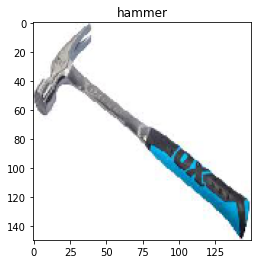

In [ ]:
def drawtools(img,label):
  plt.title(train_labels_dic2[label])
  plt.imshow(img)
  plt.show()

drawtools(x_train[0]/255.0,y_train[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

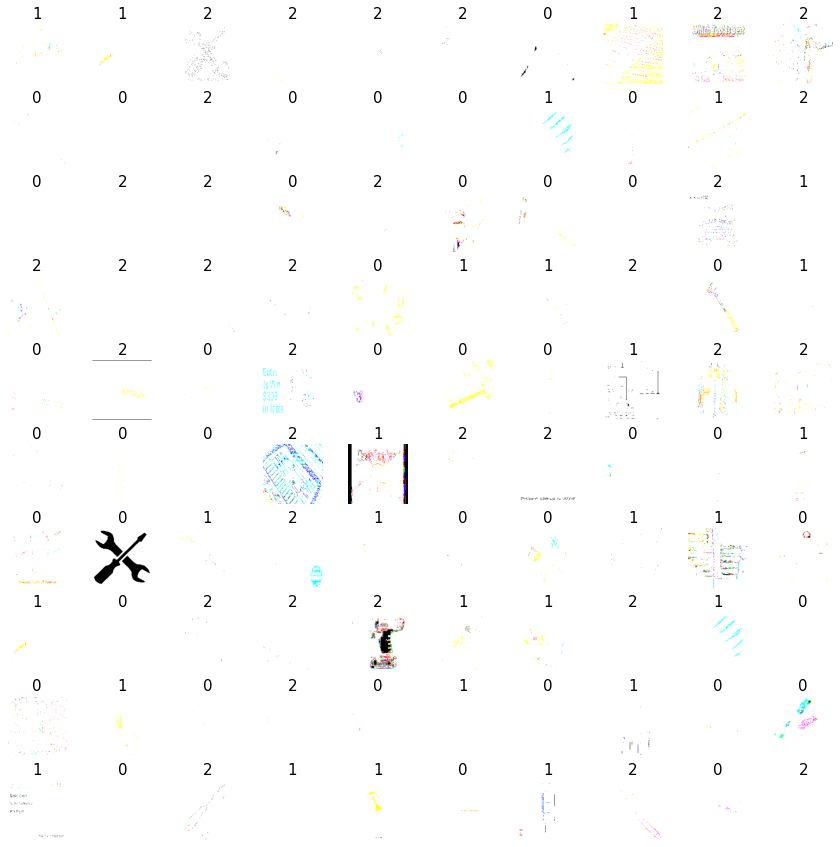

In [ ]:
w_grid = 10
l_grid = 10

fig, axes = plt.subplots(l_grid, w_grid, figsize = (15,15))

axes =axes.ravel()

n_training = len(x_train)

for i in np.arange(0,w_grid*l_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index],fontsize =15)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
X_train_gray = np.sum(x_train/3, axis = 3, keepdims= True)
x_validation_gray = np.sum(x_valid/3, axis = 3, keepdims= True)
x_testing_gray = np.sum(x_test/3, axis = 3, keepdims= True)

In [ ]:
X_train_gray.shape

(2400, 150, 150, 1)

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128
x_testing_gray_norm = (x_testing_gray - 128)/128

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


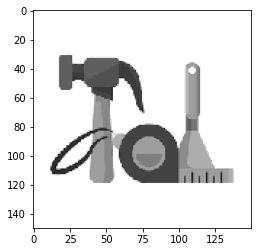

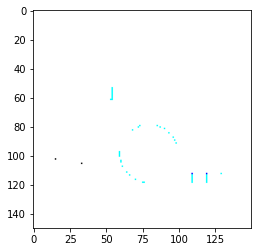

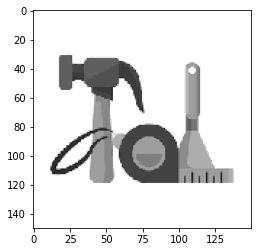

In [ ]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [ ]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()


CNN.add(layers.Conv2D(6,(5,5), activation = 'relu', input_shape = (150, 150, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())



CNN.add(layers.Flatten())


CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 146, 146, 6)       156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 73, 73, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 69, 69, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)              

In [ ]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [ ]:
history = CNN.fit(X_train_gray_norm,
                  y_train,
                  batch_size = 16,
                  epochs = 10,
                  verbose = 1, 
                  validation_data =(x_validation_gray_norm, y_valid) )

Epoch 1/10
150/150 [==============================] - 48s 317ms/step - loss: 1.2084 - accuracy: 0.3679 - val_loss: 1.0416 - val_accuracy: 0.5008
Epoch 2/10
150/150 [==============================] - 47s 316ms/step - loss: 1.0355 - accuracy: 0.4688 - val_loss: 1.0291 - val_accuracy: 0.5075
Epoch 3/10
150/150 [==============================] - 48s 319ms/step - loss: 0.9375 - accuracy: 0.5675 - val_loss: 1.0092 - val_accuracy: 0.5283
Epoch 4/10
150/150 [==============================] - 47s 314ms/step - loss: 0.8176 - accuracy: 0.6267 - val_loss: 1.1370 - val_accuracy: 0.5100
Epoch 5/10
150/150 [==============================] - 47s 314ms/step - loss: 0.6427 - accuracy: 0.7296 - val_loss: 1.0859 - val_accuracy: 0.5150
Epoch 6/10
150/150 [==============================] - 47s 314ms/step - loss: 0.4650 - accuracy: 0.8150 - val_loss: 1.3365 - val_accuracy: 0.5092
Epoch 7/10
150/150 [==============================] - 47s 314ms/step - loss: 0.3235 - accuracy: 0.8796 - val_loss: 1.5820 - val_ac

In [ ]:
score = CNN.evaluate(x_testing_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

22/22 [==============================] - 4s 182ms/step - loss: 2.5374 - accuracy: 0.3683
Test Accuracy: 0.36834320425987244


In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

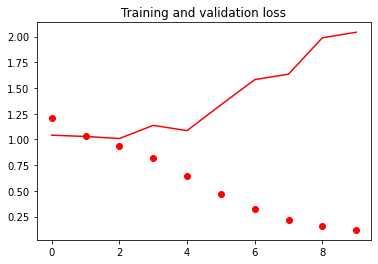

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

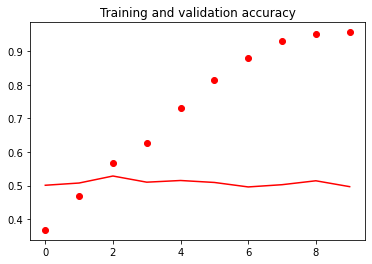

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')

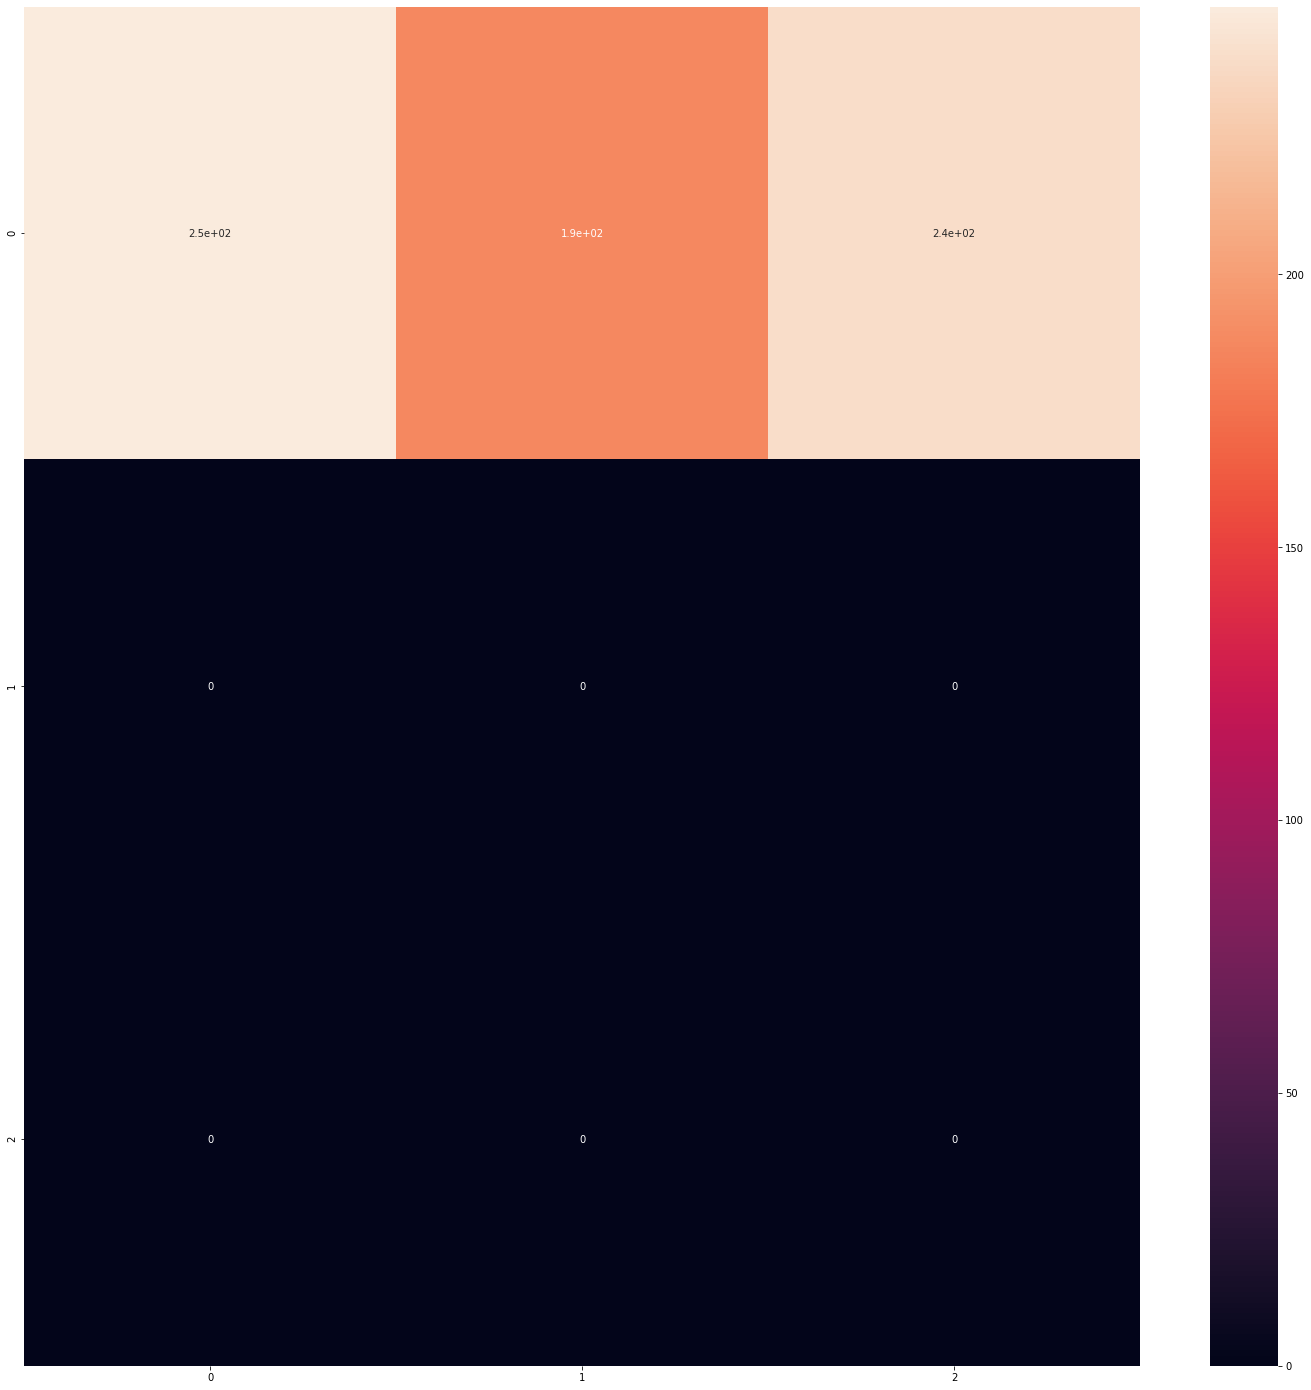

In [ ]:
predicted_classes = CNN.predict_classes(x_testing_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

# **This model seems underfit**